<a href="https://colab.research.google.com/github/Rohan-crypt/DeepLearning/blob/main/Lab_3(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exp 4: Introduction to pretrained models and transfer learning.
Task: Perform classification task with pretrained model Using Image Data.

In [ ]:
import kagglehub
import os
import matplotlib.pyplot as plt
import cv2


In [ ]:
# Download dataset
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")
print("Dataset Path:", path)


Dataset Path: /kaggle/input/cards-image-datasetclassification


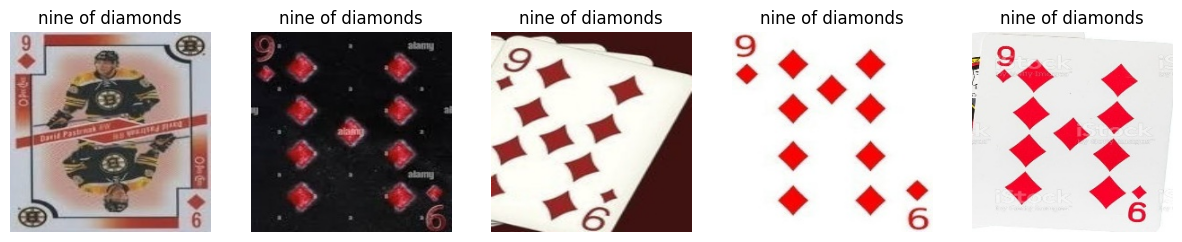

In [ ]:
import random

# Choose dataset folder (train set)
train_path = os.path.join(path, "train")

# Pick a random class
random_class = random.choice(os.listdir(train_path))
class_path = os.path.join(train_path, random_class)

# Pick random images from that class
images = random.sample(os.listdir(class_path), 5)

plt.figure(figsize=(15,5))
for i, img_name in enumerate(images):
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(random_class)
    plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [ ]:
# Dataset paths
train_dir = os.path.join(path, "train")
test_dir  = os.path.join(path, "test")

# Preprocessing with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [ ]:
# Load MobileNetV2 without top classifier
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model = models.Sequential([
    base_model,
    layers.Flatten(),  # Replace GlobalAveragePooling2D with Flatten

    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1024)           │    64,226,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,187,829 (256.30 MB)

 Trainable params: 66,939,445 (255.35 MB)

 Non-trainable params: 248,384 (970.25 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)


history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,   # Increased epochs for potential benefit with augmentation
    verbose=1,
    callbacks=[early_stopping, model_checkpoint, reduce_lr] # Add callbacks
)

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2118 - loss: 3.3547

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


239/239 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step - accuracy: 0.2124 - loss: 3.3518 - val_accuracy: 0.8679 - val_loss: 0.7522 - learning_rate: 1.0000e-04
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6490 - loss: 1.5987

239/239 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.6493 - loss: 1.5980 - val_accuracy: 0.9208 - val_loss: 0.3985 - learning_rate: 1.0000e-04
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7792 - loss: 1.0978

239/239 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - accuracy: 0.7793 - loss: 1.0975 - val_accuracy: 0.9245 - val_loss: 0.3189 - learning_rate: 1.0000e-04
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8356 - loss: 0.8370

239/239 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.8356 - loss: 0.8370 - val_accuracy: 0.9358 - val_loss: 0.2426 - learning_rate: 1.0000e-04
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8539 - loss: 0.7327

239/239 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.8539 - loss: 0.7325 - val_accuracy: 0.9396 - val_loss: 0.2163 - learning_rate: 1.0000e-04
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8608 - loss: 0.6240

239/239 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.8608 - loss: 0.6241 - val_accuracy: 0.9585 - val_loss: 0.1710 - learning_rate: 1.0000e-04
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 570s 2s/step - accuracy: 0.8853 - loss: 0.5527 - val_accuracy: 0.9396 - val_loss: 0.1852 - learning_rate: 1.0000e-04
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8748 - loss: 0.5571

239/239 ━━━━━━━━━━━━━━━━━━━━ 579s 2s/step - accuracy: 0.8748 - loss: 0.5570 - val_accuracy: 0.9660 - val_loss: 0.1369 - learning_rate: 1.0000e-04
Epoch 9/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.8946 - loss: 0.4840 - val_accuracy: 0.9585 - val_loss: 0.1573 - learning_rate: 1.0000e-04
Epoch 10/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.8947 - loss: 0.4530 - val_accuracy: 0.9585 - val_loss: 0.1557 - learning_rate: 1.0000e-04
Epoch 11/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8992 - loss: 0.4164

239/239 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.8992 - loss: 0.4163 - val_accuracy: 0.9585 - val_loss: 0.1338 - learning_rate: 1.0000e-04
Epoch 12/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9061 - loss: 0.4019

239/239 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.9061 - loss: 0.4019 - val_accuracy: 0.9698 - val_loss: 0.1228 - learning_rate: 1.0000e-04
Epoch 13/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 0.9057 - loss: 0.3831 - val_accuracy: 0.9547 - val_loss: 0.1298 - learning_rate: 1.0000e-04
Epoch 14/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 569s 2s/step - accuracy: 0.9172 - loss: 0.3623 - val_accuracy: 0.9547 - val_loss: 0.1742 - learning_rate: 1.0000e-04
Epoch 15/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.9140 - loss: 0.3552 - val_accuracy: 0.9547 - val_loss: 0.1236 - learning_rate: 1.0000e-04
Epoch 16/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.9137 - loss: 0.3370 - val_accuracy: 0.9585 - val_loss: 0.1819 - learning_rate: 1.0000e-04
Epoch 17/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.9190 - loss: 0.3206 - val_accuracy: 0.9547 - val_loss: 0.1704 - learning_rate: 1.0000e-04


In [ ]:
loss, accuracy = model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 787ms/step - accuracy: 0.9703 - loss: 0.1512
Test Loss: 0.12276281416416168
Test Accuracy: 0.9698113203048706


In [ ]:
from sklearn.metrics import classification_report

# Get predictions
predictions = model.predict(test_generator)
y_pred = tf.argmax(predictions, axis=1)
y_true = test_generator.classes[test_generator.index_array]

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 884ms/step
                   precision    recall  f1-score   support

     ace of clubs       0.00      0.00      0.00         5
  ace of diamonds       0.00      0.00      0.00         5
    ace of hearts       0.00      0.00      0.00         5
    ace of spades       0.00      0.00      0.00         5
   eight of clubs       0.00      0.00      0.00         5
eight of diamonds       0.33      0.40      0.36         5
  eight of hearts       0.00      0.00      0.00         5
  eight of spades       0.00      0.00      0.00         5
    five of clubs       0.00      0.00      0.00         5
 five of diamonds       0.00      0.00      0.00         5
   five of hearts       0.17      0.20      0.18         5
   five of spades       0.20      0.20      0.20         5
    four of clubs       0.00      0.00      0.00         5
 four of diamonds       0.00      0.00      0.00         5
   four of hearts       0.00      0.00      0.00         5
   four of spad

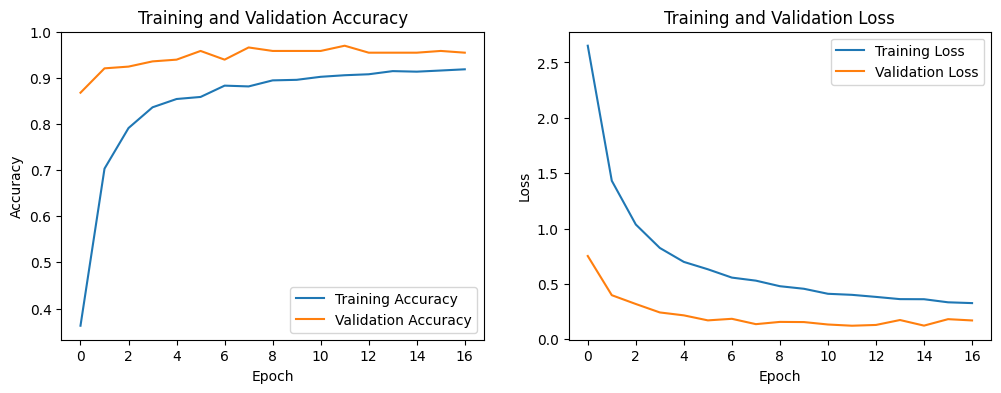

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Let's test the model with a new card image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The predicted class for the image is: seven of diamonds


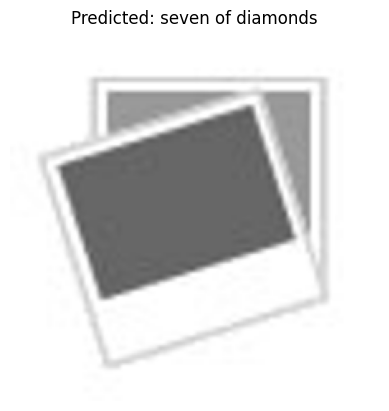

In [ ]:
# Function to load and preprocess an image from a URL
import requests
from PIL import Image
from io import BytesIO

def preprocess_image_from_url(image_url, target_size=(224, 224)):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Raise an exception for bad status codes
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB') # Ensure image is in RGB format
        img = img.resize(target_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0  # Rescale to match the training data preprocessing
        img_array = tf.expand_dims(img_array, axis=0) # Add batch dimension
        return img_array, img

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None, None
    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None


# Replace with the URL of the image you want to test
image_url = "https://i.ebayimg.com/images/g/rxAAAOSw~qFgZ1y3/s-l1600.jpg" # Example URL (Nine of Diamonds)


preprocessed_image, original_image = preprocess_image_from_url(image_url)

if preprocessed_image is not None:
    # Get class labels from the test generator
    class_labels = list(test_generator.class_indices.keys())

    # Make a prediction
    predictions = model.predict(preprocessed_image)

    # Get the predicted class index
    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    print(f"The predicted class for the image is: {predicted_class_label}")

    # Display the image
    plt.imshow(original_image)
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis("off")
    plt.show()
else:
    print("Could not process the image from the provided URL.")